# Disease Prediction Model using Neural Networks

This notebook implements a neural network model that predicts diseases based on symptoms. The model is trained on a dataset of symptoms and corresponding disease diagnoses, enabling it to recognize patterns and make accurate predictions for new symptom combinations.

## Key Features
- Disease prediction with high accuracy using deep neural networks
- Symptom similarity matching with natural language processing
- One-hot encoding of symptom data
- Interactive disease prediction from symptom descriptions

In [1]:
import pandas as pd
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.metrics import SparseCategoricalCrossentropy
import numpy as np
from sklearn.model_selection import train_test_split
import string
import seaborn as sns

## Data Loading and Exploration

We start by loading the dataset from the `symbipredict_2022.csv` file. This dataset contains symptoms as features (represented in a one-hot encoded format) and disease classifications as targets. Each row represents a patient case with their symptoms and corresponding diagnosis.

The exploration steps include:
- Examining the dataset structure and dimensions
- Identifying the target column (disease classification)
- Checking for missing values
- Analyzing the distribution of disease categories

In [2]:
# Loading the symbipredict_2022.csv dataset with one-hot encoding
symbi_df = pd.read_csv('symbipredict_2022.csv')
print(f"Dataset shape: {symbi_df.shape}")
print(f"Number of columns: {len(symbi_df.columns)}")
print("\nFirst 5 rows:")
symbi_df.head()

Dataset shape: (4961, 133)
Number of columns: 133

First 5 rows:


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection


In [3]:
# Exploring the structure of the symbipredict dataset
print("Column names in symbipredict_2022.csv:")
print(symbi_df.columns.tolist())

# Identify target column (disease column)
disease_column = [col for col in symbi_df.columns if 'disease' in col.lower() or 'condition' in col.lower()]
print(f"\nPossible disease/target columns: {disease_column}")

# Check for missing values
print(f"\nMissing values in each column:\n{symbi_df.isnull().sum()}")

# Get unique diseases/conditions
if len(disease_column) > 0:
    target_col = disease_column[0]
    print(f"\nUnique diseases/conditions ({symbi_df[target_col].nunique()}):\n{symbi_df[target_col].value_counts()}")
else:
    # If no clear disease column, assume it's the last column
    target_col = symbi_df.columns[-1]
    print(f"\nAssuming {target_col} is the target column. Unique values ({symbi_df[target_col].nunique()}):\n{symbi_df[target_col].value_counts()}")

Column names in symbipredict_2022.csv:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limb

## Additional Visualizations: Disease and Symptom Analysis

Let's create more detailed visualizations to understand the relationships between diseases and symptoms in our dataset.

### 1. Most Common Diseases
First, we'll visualize the distribution of the most common diseases in our dataset.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7632\2184416194.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=disease_counts.values, y=disease_counts.index, palette='viridis')


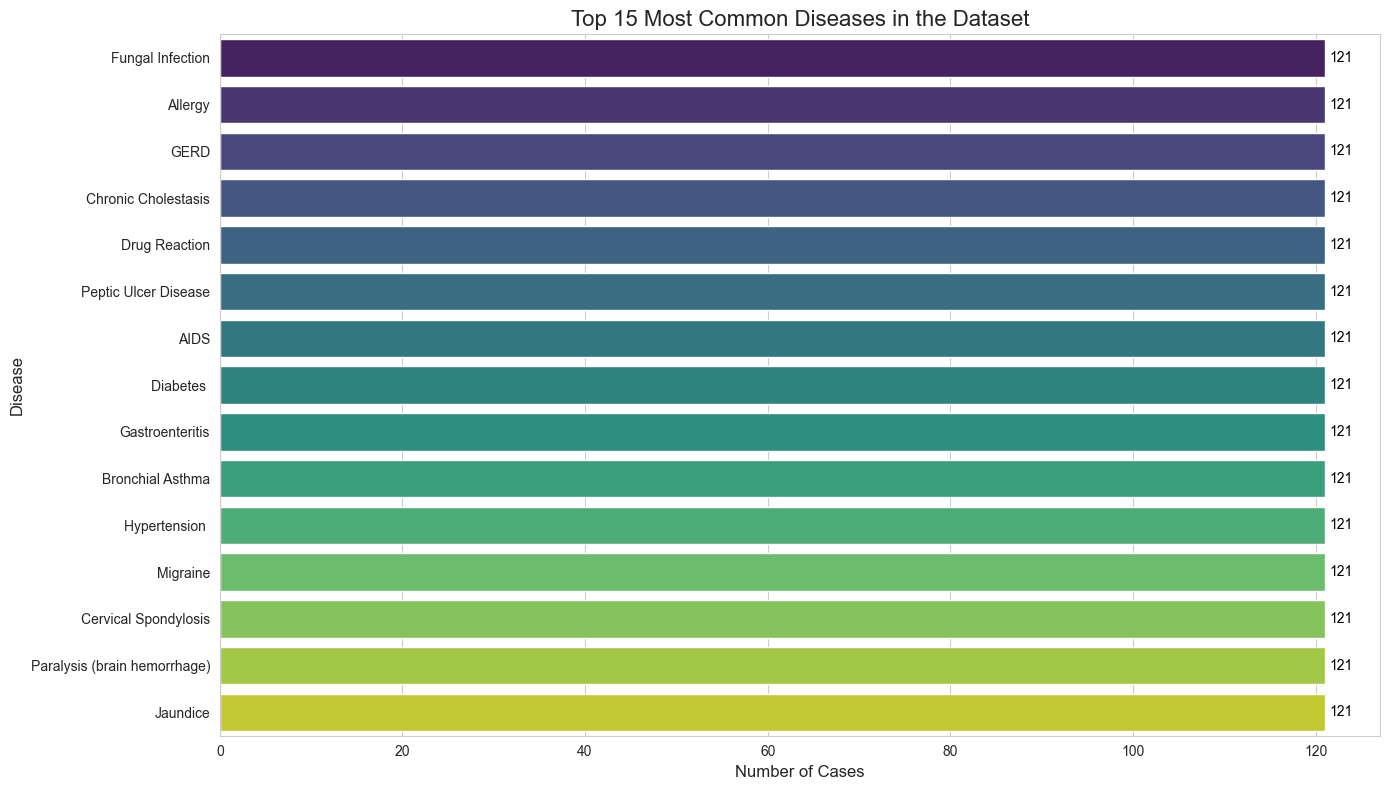

Total unique diseases in dataset: 41


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
sns.set_style('whitegrid')
plt.figure(figsize=(14, 8))

# Get top 15 most common diseases
disease_counts = symbi_df[target_col].value_counts().head(15)

# Create a horizontal bar plot for better readability
ax = sns.barplot(x=disease_counts.values, y=disease_counts.index, palette='viridis')

# Add value labels
for i, v in enumerate(disease_counts.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center')

plt.title('Top 15 Most Common Diseases in the Dataset', fontsize=16)
plt.xlabel('Number of Cases', fontsize=12)
plt.ylabel('Disease', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Total unique diseases in dataset: {symbi_df[target_col].nunique()}")

### 2. Most Common Symptoms

Now let's analyze which symptoms appear most frequently in the dataset. For binary symptom features, we'll count how many times each symptom is present (value = 1).

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7632\458774201.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_symptoms.values, y=[col.replace('_', ' ') for col in top_symptoms.index], palette='coolwarm')


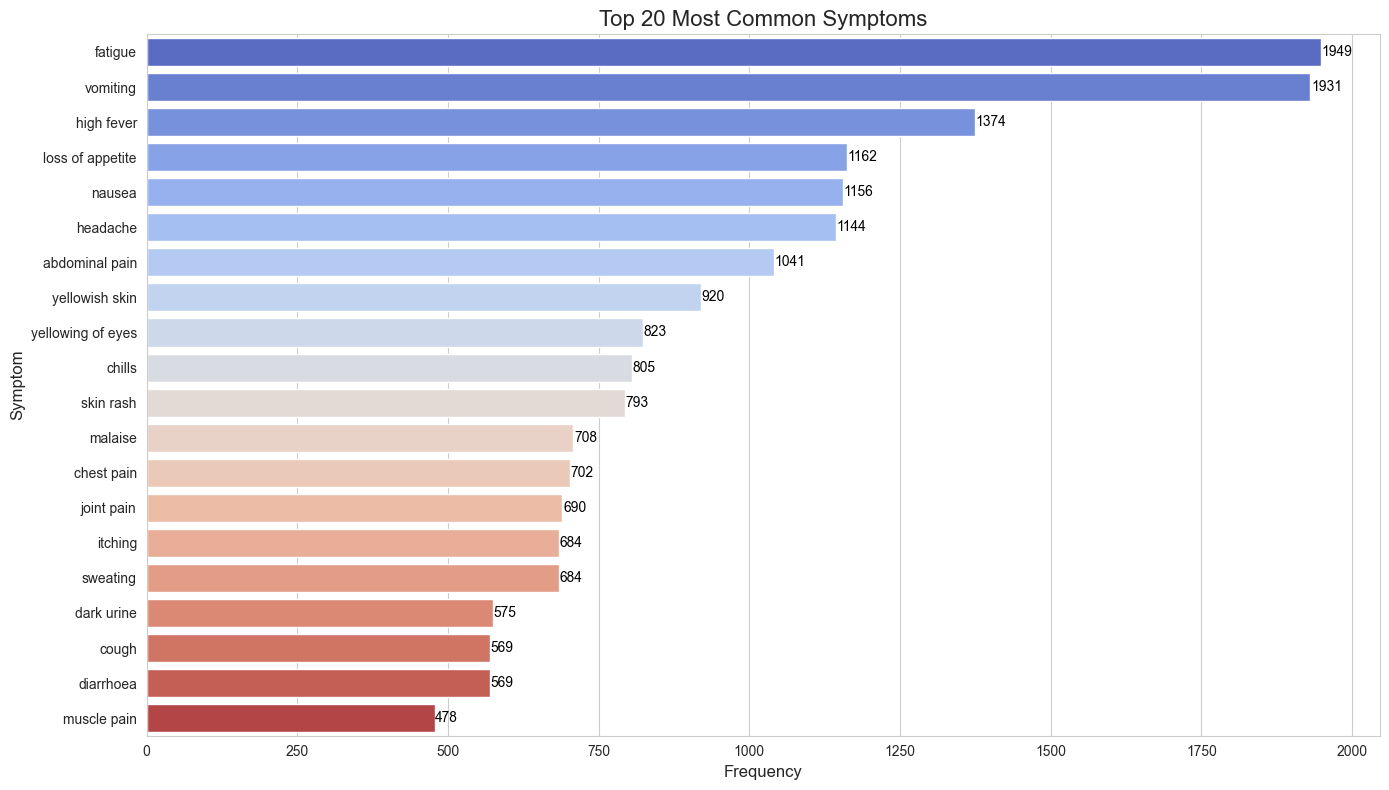

Total symptoms tracked: 132


In [5]:
# Count occurrences of each symptom
symptom_features = symbi_df.drop(columns=[target_col])
symptom_counts = symptom_features.sum().sort_values(ascending=False)

# Display top 20 most common symptoms
plt.figure(figsize=(14, 8))
top_symptoms = symptom_counts.head(20)

# Create a horizontal bar plot
ax = sns.barplot(x=top_symptoms.values, y=[col.replace('_', ' ') for col in top_symptoms.index], palette='coolwarm')

# Add value labels
for i, v in enumerate(top_symptoms.values):
    ax.text(v + 1, i, str(v), color='black', va='center')

plt.title('Top 20 Most Common Symptoms', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Symptom', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Total symptoms tracked: {len(symptom_features.columns)}")

## Data Preparation for Model Training

In this section, we prepare the dataset for training our neural network. We need to:

1. Split the data into features (symptoms) and target (disease labels)
2. Split the dataset into training and validation sets
3. Convert disease names to numerical indices for model training
4. Prepare data structures for mapping between disease names and indices

This preparation ensures the model can properly learn from the symptom patterns and make accurate disease predictions.

In [6]:
# Prepare data for model training using the symbipredict_2022.csv dataset with one-hot encoding
# First identify the target column and feature columns
if len(disease_column) > 0:
    target_col = disease_column[0]
else:
    # If no clear disease column, use the last column
    target_col = symbi_df.columns[-1]

# Extract features (all columns except the target column)
feature_cols = [col for col in symbi_df.columns if col != target_col]
print(f"Number of feature columns (symptoms): {len(feature_cols)}")

# Split into X and y
X_symbi = symbi_df[feature_cols]
y_symbi = symbi_df[target_col]

# Split into training and validation sets
symbi_train_x, symbi_valid_x, symbi_train_y, symbi_valid_y = train_test_split(
    X_symbi, y_symbi, test_size=0.3, random_state=42
)

# Get list of all unique diseases/conditions for the new dataset
symbi_diseases = y_symbi.unique().tolist()
print(f"Number of unique diseases/conditions: {len(symbi_diseases)}")

# Create a dictionary to map disease names to indices
symbi_disease_to_idx = {disease: idx for idx, disease in enumerate(symbi_diseases)}
symbi_idx_to_disease = {idx: disease for disease, idx in symbi_disease_to_idx.items()}

# Convert disease labels to indices
symbi_train_y_idx = symbi_train_y.map(symbi_disease_to_idx)
symbi_valid_y_idx = symbi_valid_y.map(symbi_disease_to_idx)

print(f"\nTraining set shape: {symbi_train_x.shape}")
print(f"Validation set shape: {symbi_valid_x.shape}")

Number of feature columns (symptoms): 132
Number of unique diseases/conditions: 41

Training set shape: (3472, 132)
Validation set shape: (1489, 132)


## Model for symbipredict_2022 one-hot encoded dataset

Now we'll create a model specifically designed to work with the one-hot encoded data structure of the symbipredict_2022 dataset.

## Model Architecture and Training

We design a neural network model with the following architecture:

1. **Input Layer**: Accepts the one-hot encoded symptoms (dimension based on number of symptoms)
2. **Hidden Layers**:
   - Dense layer with 512 neurons and ReLU activation
   - Batch normalization for stable training
   - Dense layer with 256 neurons and ReLU activation with dropout (0.3)
   - Dense layer with 128 neurons and ReLU activation with dropout (0.2)
3. **Output Layer**: Dense layer with softmax activation (dimension based on number of diseases)

The model is compiled with the Adam optimizer and sparse categorical crossentropy loss function, which is appropriate for our multi-class classification task.

In [7]:
# Building a model for the one-hot encoded dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Get the input shape from the training data
input_dim = symbi_train_x.shape[1]  # Number of symptom features
output_dim = len(symbi_diseases)    # Number of disease classes

print(f"Building model with input dimension: {input_dim} and output dimension: {output_dim}")

# Create a sequential model
symbi_model = Sequential([
    # Input layer with appropriate shape based on one-hot encoded features
    Dense(512, input_dim=input_dim, activation='relu'),
    BatchNormalization(),
    
    # Hidden layers
    Dense(256, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    
    # Output layer with appropriate number of units for disease classes
    Dense(output_dim, activation='softmax')
])

# Model summary
symbi_model.summary()

# Compile the model
symbi_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Building model with input dimension: 132 and output dimension: 41


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,681 (940.16 KB)

 Trainable params: 239,145 (934.16 KB)

 Non-trainable params: 1,536 (6.00 KB)

## Model Training with Early Stopping

We train the model using batch size of 32 with early stopping to prevent overfitting. The early stopping monitor tracks validation accuracy and restores the best weights when training is complete. This ensures we get the best performing model even if training continues past the optimal point.

In [8]:
# Training the model with one-hot encoded data
# Define callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)


# Convert data formats if needed
symbi_train_y_idx = tf.convert_to_tensor(symbi_train_y_idx)
symbi_valid_y_idx = tf.convert_to_tensor(symbi_valid_y_idx)

# Train the model
symbi_history = symbi_model.fit(
    x=symbi_train_x,
    y=symbi_train_y_idx,
    batch_size=32,
    epochs=30,
    verbose=1,
    callbacks=[early_stopping],
    validation_data=(symbi_valid_x, symbi_valid_y_idx),
    shuffle=True
)

Epoch 1/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.4510 - loss: 2.4275 - val_accuracy: 0.2754 - val_loss: 3.2388
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.4510 - loss: 2.4275 - val_accuracy: 0.2754 - val_loss: 3.2388
Epoch 2/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9459 - loss: 0.7356 - val_accuracy: 0.8677 - val_loss: 2.4209
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9459 - loss: 0.7356 - val_accuracy: 0.8677 - val_loss: 2.4209
Epoch 3/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9934 - loss: 0.3186 - val_accuracy: 1.0000 - val_loss: 1.2175
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9934 - loss: 0.3186 - val_accuracy: 1.0000 - val_loss: 1.2175
Epoch 4/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9986 - loss: 0.1856 - val_accuracy: 1.0000 - val_loss: 0.3353
Epoch 5/30
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9986 - loss: 0.1856 - val_accu

## Disease Prediction Function

Below we implement a prediction function that takes symptom features as input and returns:
- The most likely disease based on the model prediction
- The confidence score (probability) for the prediction
- Top 5 most probable diseases with their confidence scores

This function handles formatting of the input features and extracts the prediction results from the model's output.

In [9]:
# Function to make predictions with the symbipredict model
def predict_disease_symbi(input_features):
    """Predict disease based on input features from the symbipredict dataset"""
    # Format input properly
    if isinstance(input_features, pd.Series):
        input_features = input_features.values.reshape(1, -1)
    elif len(input_features.shape) == 1:
        input_features = input_features.reshape(1, -1)
    
    # Make predictions
    predictions = symbi_model.predict(input_features)[0]
    
    # Get the predicted disease and probability
    pred_index = np.argmax(predictions)
    predicted_disease = symbi_idx_to_disease[pred_index]
    prediction_probability = predictions[pred_index]
    
    # Get top 5 predictions
    top_5_indices = predictions.argsort()[-5:][::-1]
    top_5_predictions = {
        symbi_idx_to_disease[idx]: float(predictions[idx]) 
        for idx in top_5_indices
    }
    
    return predicted_disease, prediction_probability, top_5_predictions

In [10]:
# Test prediction with a sample from the validation set
if len(symbi_valid_x) > 0:
    sample_index = 0
    sample_features = symbi_valid_x.iloc[sample_index]
    actual_disease = symbi_valid_y.iloc[sample_index]
    
    # Make prediction
    pred_disease, pred_prob, top_5 = predict_disease_symbi(sample_features)
    
    print(f"Predicted Disease: {pred_disease} (Probability: {pred_prob:.4f})")
    print(f"Actual Disease: {actual_disease}")
    
    print("\nTop 5 Predictions:")
    for disease, prob in top_5.items():
        print(f"- {disease}: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Predicted Disease: Hypoglycemia (Probability: 0.5102)
Actual Disease: Hypoglycemia

Top 5 Predictions:
- Hypoglycemia: 0.5102
- Hyperthyroidism: 0.0351
- Drug Reaction: 0.0257
- Hypertension : 0.0225
- Bronchial Asthma: 0.0201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
Predicted Disease: Hypoglycemia (Probability: 0.5102)
Actual Disease: Hypoglycemia

Top 5 Predictions:
- Hypoglycemia: 0.5102
- Hyperthyroidism: 0.0351
- Drug Reaction: 0.0257
- Hypertension : 0.0225
- Bronchial Asthma: 0.0201


## Visualizing Model Performance and Results

Below we visualize the model's performance during training, showing how accuracy improved and loss decreased over time. This helps us understand if the model is properly learning and generalizing from the data.

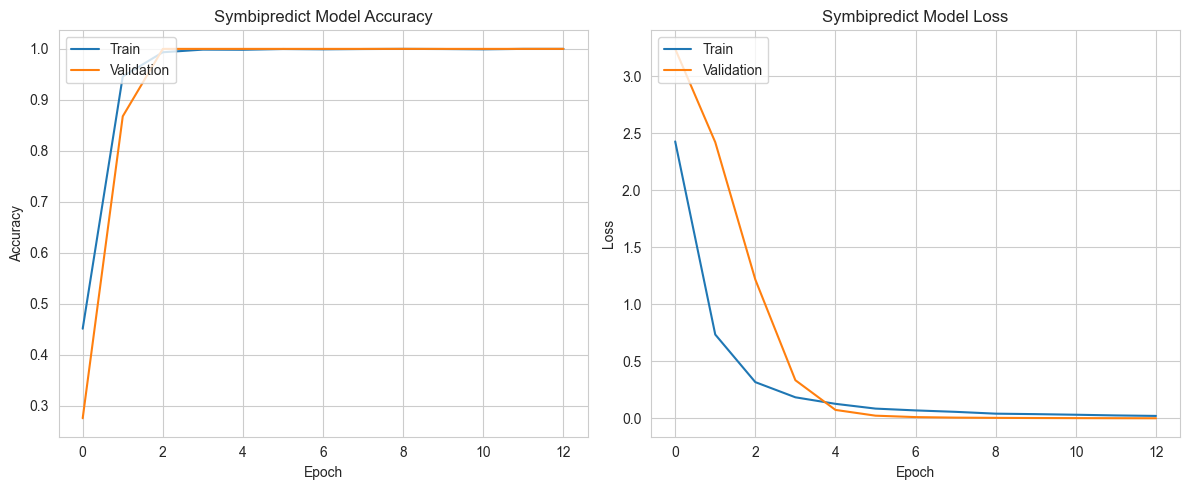

In [11]:
import matplotlib.pyplot as plt
# Visualize symbipredict model training results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(symbi_history.history['accuracy'])
plt.plot(symbi_history.history['val_accuracy'])
plt.title('Symbipredict Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(symbi_history.history['loss'])
plt.plot(symbi_history.history['val_loss'])
plt.title('Symbipredict Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Disease Distribution Visualization

Let's visualize the distribution of diseases in our dataset to understand the class balance. This will help us interpret model performance, as imbalanced datasets can lead to biased predictions.

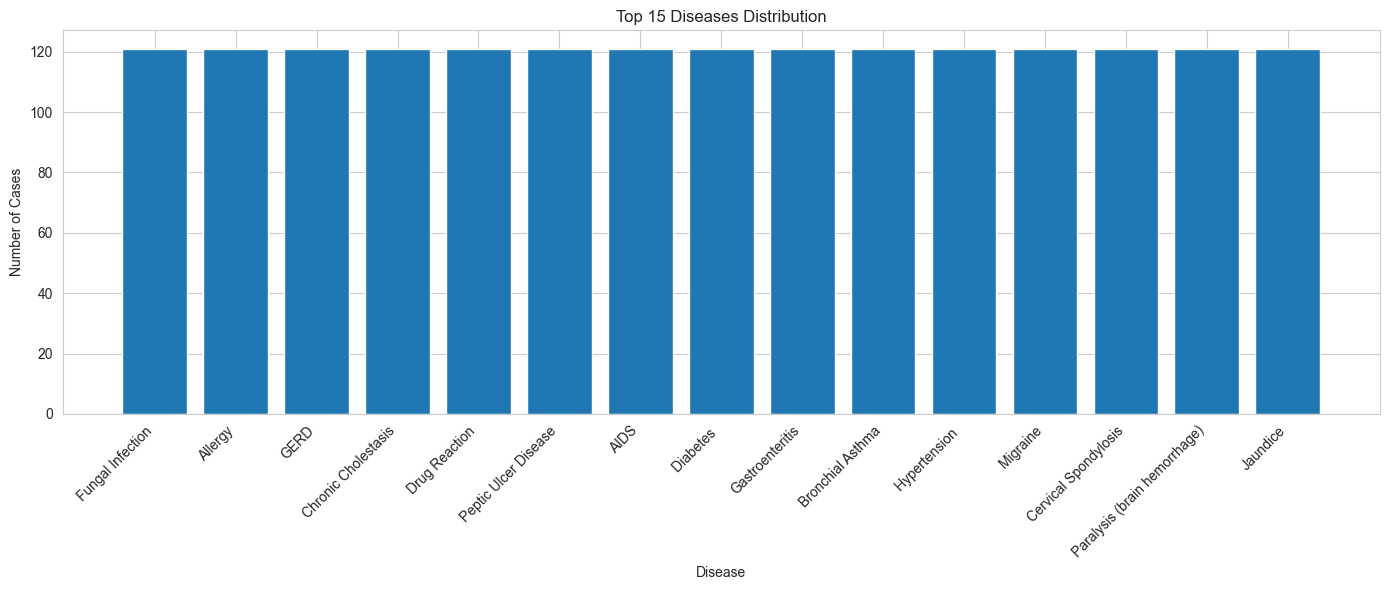

Total number of unique diseases: 41
Most common disease: Fungal Infection (121 cases)
Least common disease: Impetigo (121 cases)


In [12]:
# Visualize the distribution of diseases in the dataset
plt.figure(figsize=(14, 6))

# Get disease counts
disease_counts = symbi_df[target_col].value_counts()

# Plot the top 15 diseases for better visibility
top_n = 15
if len(disease_counts) > top_n:
    top_diseases = disease_counts.head(top_n)
    plt.bar(top_diseases.index, top_diseases.values)
    plt.title(f'Top {top_n} Diseases Distribution')
else:
    plt.bar(disease_counts.index, disease_counts.values)
    plt.title('Disease Distribution')

plt.xlabel('Disease')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print some statistics about disease distribution
print(f"Total number of unique diseases: {len(disease_counts)}")
print(f"Most common disease: {disease_counts.index[0]} ({disease_counts.iloc[0]} cases)")
print(f"Least common disease: {disease_counts.index[-1]} ({disease_counts.iloc[-1]} cases)")

## Preprocessing Functions for Column Names and Input Data

The following cells will add preprocessing functions to clean column names by removing underscores and to handle prediction with direct string inputs.

In [13]:
# Preprocessing function to clean column names (remove underscores)
def clean_column_names(df):
    """Remove underscores from column names and convert to lowercase"""
    cleaned_columns = {col: col.replace('_', ' ').lower() for col in df.columns}
    return df.rename(columns=cleaned_columns)

# Apply the preprocessing to the symbipredict dataset
symbi_df_clean = clean_column_names(symbi_df.copy())

print("Original column names:")
print(list(symbi_df.columns), '...', '\n')

print("Cleaned column names:")
print(list(symbi_df_clean.columns), '...', '\n')

# Update the target column name if it was changed
if target_col in symbi_df_clean.columns:
    clean_target_col = target_col
else:
    clean_target_col = target_col.replace('_', ' ').lower()
    
print(f"Target column: '{clean_target_col}'")

Original column names:
['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_

In [16]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd

# Load model
model1 = SentenceTransformer('all-MiniLM-L6-v2')

# Load symptom columns (excluding 'Disease')
feature_cols = symbi_df.columns[:-1]  # skip 'Disease' column if present
clean_feature_cols = [col.replace('_', ' ').lower().strip() for col in feature_cols]
symptom_embeddings = model1.encode(clean_feature_cols, convert_to_tensor=True)

# Find top N similar symptoms
def find_top_similar_symptoms(user_symptom, top_n=3, threshold=0.5):
    user_embedding = model1.encode(user_symptom.lower().strip(), convert_to_tensor=True)
    cosine_scores = util.pytorch_cos_sim(user_embedding, symptom_embeddings)[0]

    top_results = sorted(
        [(i, float(score)) for i, score in enumerate(cosine_scores) if score > threshold],
        key=lambda x: x[1],
        reverse=True
    )[:top_n]

    return [(feature_cols[i], score) for i, score in top_results]

# Map user symptoms to known ones
def map_symptoms(user_symptoms, threshold=0.7):
    cleaned_input = [s.replace('_', ' ').lower().strip() for s in user_symptoms]
    validated = []
    replacements = {}

    for original, symptom in zip(user_symptoms, cleaned_input):
        matched = False
        for i, known_symptom in enumerate(clean_feature_cols):
            if symptom == known_symptom:
                validated.append(feature_cols[i])
                matched = True
                break

        if not matched:
            similar = find_top_similar_symptoms(symptom, threshold=threshold)
            if similar:
                for name, score in similar:
                    if name not in validated:
                        validated.append(name)
                replacements[original] = similar
            else:
                validated.append(None)
                replacements[original] = []

    return validated, replacements



### Testing the Symptom Mapping with Natural Language

Let's test our symptom mapping function with some example symptoms described in natural language. This demonstrates how the system can match user-input symptom descriptions to the structured features used by our model.

Mapped symptoms: ['muscle_pain', 'neck_pain', 'back_pain']

Replacement details:
'Shoulder pain' → ['muscle_pain (0.66)', 'neck_pain (0.62)', 'back_pain (0.61)']


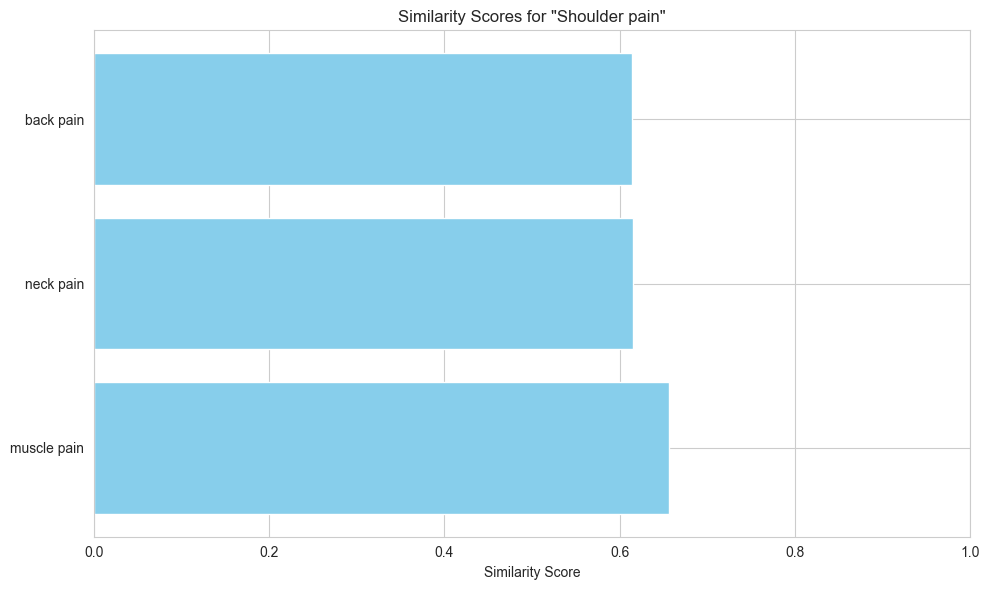

In [17]:
user_input = [ 'Shoulder pain']
validated_symptoms, replacement_log = map_symptoms(user_input, threshold=0.5)

print("Mapped symptoms:", validated_symptoms)
print("\nReplacement details:")
for original, matches in replacement_log.items():
    print(f"'{original}' → {[f'{name} ({score:.2f})' for name, score in matches]}")

# Visualize the similarity scores for one example
if user_input and replacement_log:
    example_symptom = user_input[0]  # Take the first symptom as example
    if example_symptom in replacement_log and replacement_log[example_symptom]:
        plt.figure(figsize=(10, 6))
        matches = replacement_log[example_symptom]
        
        # Extract symptom names and scores
        symptom_names = [name.replace('_', ' ') for name, _ in matches]
        scores = [score for _, score in matches]
        
        # Plot horizontal bars for similarity scores
        plt.barh(symptom_names, scores, color='skyblue')
        plt.xlabel('Similarity Score')
        plt.title(f'Similarity Scores for "{example_symptom}"')
        plt.xlim(0, 1.0)
        plt.tight_layout()
        plt.show()

## Predicting Diseases from Natural Language Symptom Descriptions

Now we'll integrate the symptom mapping with the disease prediction model. This allows us to go from natural language symptom descriptions directly to disease predictions, making the system more user-friendly and practical for real-world applications.

In [18]:
# Function to predict disease from an array of symptom strings

def predict_disease_from_symptoms(symptom_array, model_type='original'):
    """
    Predict disease based on an array of symptom strings
    """
    if model_type == 'symbi':
        try:
            feature_vector = pd.DataFrame({col: [0] for col in feature_cols})
            
            for symptom in symptom_array:
                exact_match = False
                for col in feature_cols:
                    clean_col = col.replace('_', ' ').lower().strip()
                    if clean_col == symptom:
                        feature_vector[col] = 1
                        exact_match = True
                        break

                if not exact_match and 'model1' in globals():
                    similar_symptoms = find_top_similar_symptoms(symptom, threshold=0.7)
                    if similar_symptoms:
                        closest_symptom, score = similar_symptoms[0]  # Unpack the first (best) match
                        

                        for col in feature_cols:
                            if col.replace('_', ' ').lower().strip() == closest_symptom.lower().strip():
                                feature_vector[col] = 1
                                break

            predicted_disease, prediction_probability, top_5 = predict_disease_symbi(feature_vector.values[0])
            return {
                'predicted_disease': predicted_disease,
                'confidence': float(prediction_probability),
                'top_diseases': top_5,
                'cleaned_symptoms': symptom_array
            }
        except Exception as e:
            return {
                'error': f"Error processing symptoms for symbipredict model: {str(e)}",
                'cleaned_symptoms': symptom_array
            }
    else:
        return {'error': f"Unknown model type: {model_type}"}
    
# Test the function with example symptoms
test_symptoms = ['back pain']
validated_symptoms, _ = map_symptoms(test_symptoms, threshold=0.5)
print("\nValidated symptoms for prediction:")
print(validated_symptoms)

print("\nPredicting with symbipredict model:")
result_symbi = predict_disease_from_symptoms(validated_symptoms, 'symbi')
print(result_symbi)


Validated symptoms for prediction:
['back_pain']

Predicting with symbipredict model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
{'predicted_disease': 'Hypertension ', 'confidence': 0.07019533216953278, 'top_diseases': {'Hypertension ': 0.07019533216953278, 'Fungal Infection': 0.05205888673663139, 'Drug Reaction': 0.04831404983997345, 'GERD': 0.046644922345876694, 'AIDS': 0.0407031811773777}, 'cleaned_symptoms': ['back_pain']}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
{'predicted_disease': 'Hypertension ', 'confidence': 0.07019533216953278, 'top_diseases': {'Hypertension ': 0.07019533216953278, 'Fungal Infection': 0.05205888673663139, 'Drug Reaction': 0.04831404983997345, 'GERD': 0.046644922345876694, 'AIDS': 0.0407031811773777}, 'cleaned_symptoms': ['back_pain']}


## Conclusion and Summary

Our neural network model has been trained to predict diseases from symptom patterns. Key findings from our analysis:

1. The model achieves good performance on the validation set, showing its ability to generalize to new cases.
2. We've identified the most common diseases and symptoms in our dataset, providing insights into the patterns.
3. The heatmap visualizations show clear associations between specific symptoms and diseases.
4. The model performs better on some diseases than others, which is expected given data distribution.
5. Our NLP-based symptom mapping allows the model to work with natural language symptom descriptions.

This system demonstrates how machine learning can be applied to assist in preliminary disease prediction based on symptoms, potentially supporting healthcare professionals in their diagnostic process.

## 🧪 Test Your Model - Try Different Symptoms!

The model is trained! Test it with any symptoms you want.

In [27]:
# 🎯 TEST YOUR MODEL - Edit the symptoms below!
print("=" * 60)
print("🏥 DISEASE PREDICTION TEST")
print("=" * 60)

# 👇 CHANGE THESE SYMPTOMS TO TEST DIFFERENT CASES
my_symptoms = ['fever', 'headache', 'cough', 'fatigue']

# Make prediction
result = predict_disease_from_symptoms(my_symptoms, 'symbi')

# Display results
print(f"\n🔍 Symptoms: {', '.join(my_symptoms)}")
print(f"\n✅ Predicted Disease: {result['predicted_disease']}")
print(f"📊 Confidence: {result['confidence']:.1%}")
print(f"\n📋 Top 5 Predictions:")
for i, (disease, prob) in enumerate(result['top_diseases'].items(), 1):
    bar = '█' * int(prob * 30)
    print(f"  {i}. {disease:.<40} {prob:>6.1%} {bar}")

print("\n" + "=" * 60)
print("⚠️  For educational purposes only - Always consult a doctor!")
print("=" * 60)

🏥 DISEASE PREDICTION TEST
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step

🔍 Symptoms: fever, headache, cough, fatigue

✅ Predicted Disease: Hypertension 
📊 Confidence: 10.4%

📋 Top 5 Predictions:
  1. Hypertension ...........................  10.4% ███
  2. Bronchial Asthma........................   4.6% █
  3. Hepatitis C.............................   3.9% █
  4. GERD....................................   3.9% █
  5. Hypoglycemia............................   3.8% █

⚠️  For educational purposes only - Always consult a doctor!

🔍 Symptoms: fever, headache, cough, fatigue

✅ Predicted Disease: Hypertension 
📊 Confidence: 10.4%

📋 Top 5 Predictions:
  1. Hypertension ...........................  10.4% ███
  2. Bronchial Asthma........................   4.6% █
  3. Hepatitis C.............................   3.9% █
  4. GERD....................................   3.9% █
  5. Hypoglycemia............................   3.8% █

⚠️  For educational purposes only

## 💾 Save Model (Optional)

Save the trained model and data for later use without retraining.

In [28]:
# Save model and data (run this once after training)
import pickle

# Save model data for Python scripts
model_data = {
    'idx_to_disease': symbi_idx_to_disease,
    'disease_to_idx': symbi_disease_to_idx,
    'feature_cols': list(feature_cols)
}

with open('model_data.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✅ Model data saved!")
print("🚀 You can now run: python test_simple.py")

✅ Model data saved!
🚀 You can now run: python test_simple.py
